In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogisticRegression import LogisticRegression, LogisticRegressionSklearn
from MultilayerPerceptron import MultilayerPerceptron
from plot_confusion_matrix import plot_confusion_matrix
from DecisionTree import DecisionTree
from preprocessing import *
metrics = DecisionTree()
import warnings
warnings.filterwarnings('ignore')
np.random.seed(41)

# Data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df = replace_zeros_with_median_considering_outcome(df, columns_to_fill=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Train Test Split

In [4]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

# Custom Logistic Regression Model

In [5]:
LR_Model = LogisticRegression(learning_rate=0.0001, num_iterations=1000)
LR_Model.fit(X_train, y_train)
y_pred_lr = LR_Model.predict(X_test)

logistic_regression_confusuion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion matrix: \n{logistic_regression_confusuion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(logistic_regression_confusuion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[22 33]
 [15 84]]
Accuracy: 0.6883116883116883
Precision: 0.5945945945945946
Recall: 0.4
F1: 0.4782608695652174


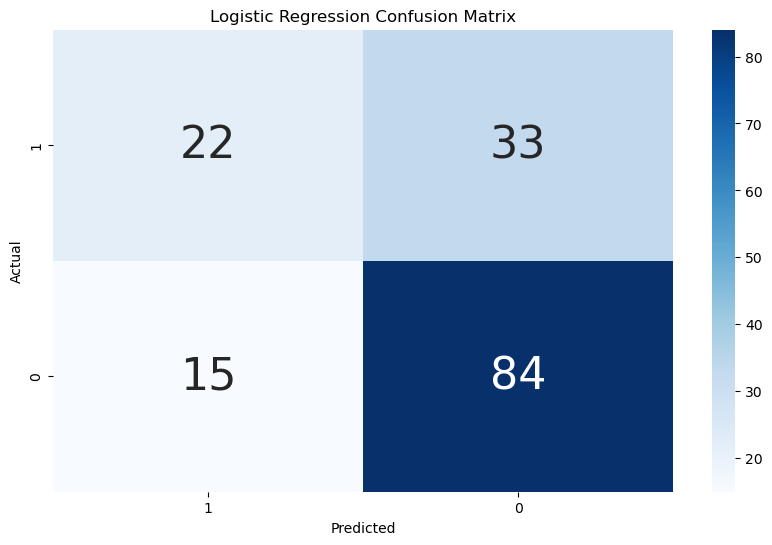

In [6]:
plot_confusion_matrix(logistic_regression_confusuion_matrix, title='Logistic Regression Confusion Matrix')

# Sklearn Logistic Regression Model

In [7]:
LR_Sklearn_Model = LogisticRegressionSklearn()
LR_Sklearn_Model.fit(X_train, y_train)
y_pred_lr = LR_Sklearn_Model.predict(X_test)

logistic_regression_sklearn_confusuion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion matrix: \n{logistic_regression_sklearn_confusuion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(logistic_regression_sklearn_confusuion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[34 21]
 [13 86]]
Accuracy: 0.7792207792207793
Precision: 0.723404255319149
Recall: 0.6181818181818182
F1: 0.6666666666666667


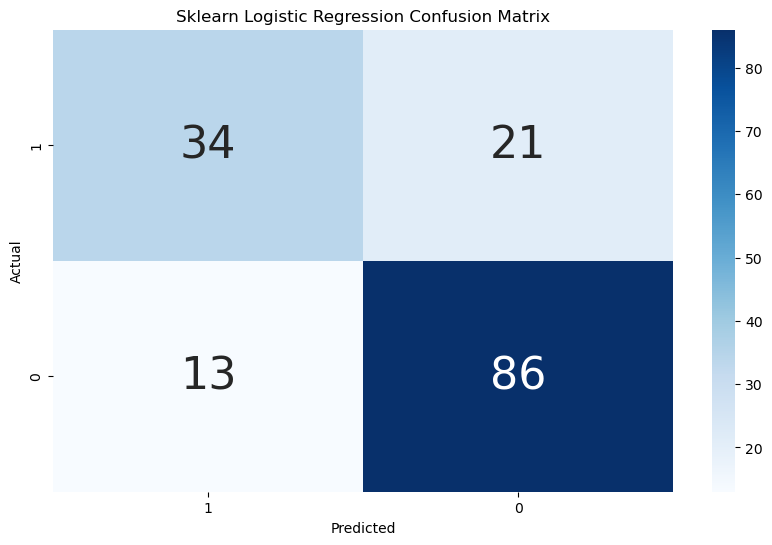

In [8]:
plot_confusion_matrix(logistic_regression_sklearn_confusuion_matrix, title='Sklearn Logistic Regression Confusion Matrix')

# Multilayer Perceptron Model

In [30]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

### Try Every Combination of Features

In [25]:
best_accuracy = 0.0
best_model_info = {}

activation_functions = ['relu', 'sigmoid', 'tanh']
optimizers = ['adam', 'sgd']

for activation in activation_functions:
    for optimizer in optimizers:
        print(f"Start - Activation = {activation}, Optimizer = {optimizer}")

        mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1],
                                   hidden_size=X_train_tensor.shape[1]*2,
                                   output_size=2,
                                   learning_rate=0.03,
                                   activation=activation,
                                   optimizer=optimizer,
                                   verbose=False)

        mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

        y_pred_mlp = mlp.predict(X_test_tensor)
        y_pred_mlp = torch.argmax(y_pred_mlp, dim=1)

        mlp_confusion_matrix = metrics.confusion_matrix(
            y_test_tensor, y_pred_mlp)
        accuracy, precision, recall, f1 = metrics.metrics(mlp_confusion_matrix)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_info = {
                "activation": activation, "optimizer": optimizer}

        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1: {f1}")
        print("-------------------------------------")

print("\n")
print(
    f"Best: Activation={best_model_info['activation']}, Optimizer={best_model_info['optimizer']}")


Start - Activation=relu, Optimizer=adam
Accuracy: 0.8571428571428571
Precision: 0.7894736842105263
Recall: 0.8181818181818182
F1: 0.8035714285714286
-------------------------------------
Start - Activation=relu, Optimizer=sgd
Accuracy: 0.7662337662337663
Precision: 0.6557377049180327
Recall: 0.7272727272727273
F1: 0.689655172413793
-------------------------------------
Start - Activation=sigmoid, Optimizer=adam
Accuracy: 0.8246753246753247
Precision: 0.71875
Recall: 0.8363636363636363
F1: 0.7731092436974789
-------------------------------------
Start - Activation=sigmoid, Optimizer=sgd
Accuracy: 0.7922077922077922
Precision: 0.6716417910447762
Recall: 0.8181818181818182
F1: 0.7377049180327869
-------------------------------------
Start - Activation=tanh, Optimizer=adam
Accuracy: 0.7922077922077922
Precision: 0.6575342465753424
Recall: 0.8727272727272727
F1: 0.7500000000000001
-------------------------------------
Start - Activation=tanh, Optimizer=sgd
Accuracy: 0.7987012987012987
Preci

Epoch 0, Training Loss: 4.76912784576416 - Training Accuracy: 0.4315961003303528
Epoch 100, Training Loss: 0.47813838720321655 - Training Accuracy: 0.7996742725372314
Epoch 200, Training Loss: 0.40406665205955505 - Training Accuracy: 0.8224755525588989
Epoch 300, Training Loss: 0.36245962977409363 - Training Accuracy: 0.8452768921852112
Epoch 400, Training Loss: 0.3363175690174103 - Training Accuracy: 0.8583061695098877
Epoch 500, Training Loss: 0.3407512903213501 - Training Accuracy: 0.8485342264175415
Epoch 600, Training Loss: 0.3151669204235077 - Training Accuracy: 0.8794788122177124
Epoch 700, Training Loss: 0.33006858825683594 - Training Accuracy: 0.8631922006607056
Epoch 800, Training Loss: 0.30931270122528076 - Training Accuracy: 0.8778501749038696
Epoch 900, Training Loss: 0.31450822949409485 - Training Accuracy: 0.871335506439209


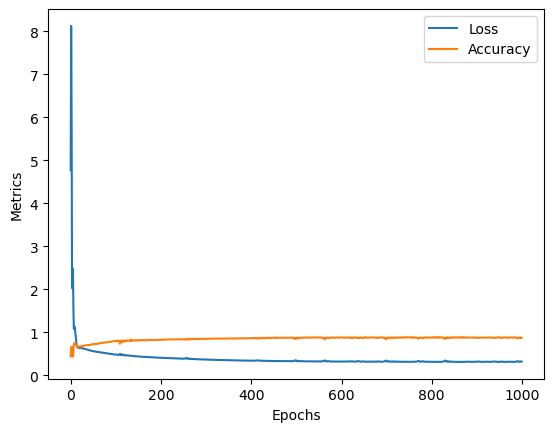

In [31]:
mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1], 
                           hidden_size=X_train_tensor.shape[1]*2, 
                           output_size=2, 
                           learning_rate=0.03,
                           activation="relu",
                           optimizer="adam",)
mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

In [32]:
y_pred_mlp = mlp.predict(X_test_tensor)
y_pred_mlp = torch.argmax(y_pred_mlp, dim=1)

mlp_confusion_matrix = metrics.confusion_matrix(y_test_tensor, y_pred_mlp)
print(f"Confusion matrix: \n{mlp_confusion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(mlp_confusion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[45 10]
 [10 89]]
Accuracy: 0.8701298701298701
Precision: 0.8181818181818182
Recall: 0.8181818181818182
F1: 0.8181818181818182


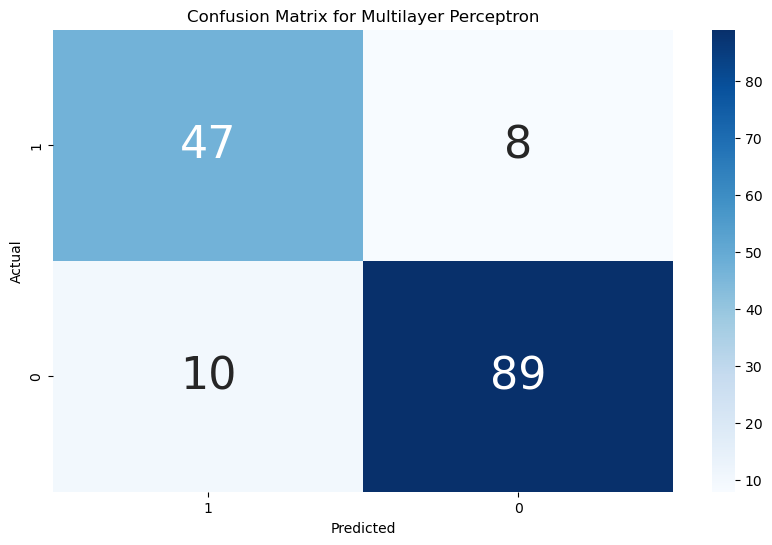

In [12]:
plot_confusion_matrix(mlp_confusion_matrix, "Confusion Matrix for Multilayer Perceptron")